# Waveguides

The goal of this notebook is to investigate the fields created in waveguides.  It complements the material in Chapter 7 of _Classical Electromagnetic Radiation_ by Marion and Heald.

A ***mode*** of a waveguide is an allowed solution of Maxwell's equations.  We will investigate the following types of modes:

- TEM
- TE
- TM

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# This will give interactive plots within the notebook.
%matplotlib notebook

# This will make interactive plots pop up in a separate window.
# It probably will not work in CoLab.
# %matplotlib tk

# This will yield static, inline plots.  The default.
# %matplotlib inline

In [2]:
# Define color scheme.
e_color = '#377eb8'
b_color = '#ff7f00'
s_color = '#4daf4a'

In [79]:
# Create a grid.
Lx = 2   #Original: 2
Nx = 5
Ly = 2   #Original: 2
Ny = 5
Lz = 4
Nz = 9

x = np.linspace(0, Lx, Nx)
y = np.linspace(0, Ly, Ny)
z = np.linspace(0, Lz, Nz)
X, Y, Z = np.meshgrid(x,y,z)

# Group all coordinates into a single array.
R = np.stack((X,Y,Z))

In [80]:
# Define the material.
mu = 1
epsilon = 1
n = np.sqrt(mu*epsilon)

## TEM Modes

TEM modes are guided electromagnetic waves in which the electric and magnetic field are perpendicular to the direction of propagation.  The name stands for "transverse electromagnetic" and refers to the fact that both the electric field and magnetic field are perpendicular to the direction of propagation.

Plane waves are TEM modes, but not all TEM modes are plane waves.  Here, we analyze the TEM modes that can propagate between a set of parallel conducting plates.  See Section 7.2 of _CER_ for a detailed theoretical background.

We consider modes where the electric field is parallel to the conducting plates.  These can be described as a superposition of two plane waves within the waveguide.  The amplitudes of the waves are equal, but they are out of phase and travel in different directions:
$$
\vec{k}_1 = \begin{bmatrix} 0 \\ - k_0 \cos \theta \\ + k_0 \sin \theta \end{bmatrix}
\qquad \qquad
\vec{k}_2 = \begin{bmatrix} 0 \\ + k_0 \cos \theta \\ + k_0 \sin \theta \end{bmatrix}
$$

The magnetic field and Poynting vector are computed as with plane waves.

Let's look at some of these modes.

In [101]:
# Define convenience function to compute fields.
def get_plane_wave(E0,k,R,n=1,t=0):
    """
    Return electric and magnetic field arrays for an
    electromagnetic plane wave.
    
    E0 = [Ex, Ey, Ez]  (amplitude and polarization)
    k =  [kx, ky, kz]  (wave vector)
    R  = [X, Y, Z]     (coordinate arrays)
    n                  (index of refraction)
    t                  (time)
    
    Returns
    (E,B) where
    E = [Ex, Ey, Ez]
    B = [Bx, By, Bz]
    """
    
    # Create empty arrays of the correct shape.
    E = np.zeros_like(R, dtype=complex)
    B = np.zeros_like(R, dtype=complex)
    
    # Compute phase of the plane wave.
    k0 = np.sqrt(np.sum(k**2))
    omega = k0/n
    phase = np.exp(1j*(k[0]*R[0] + k[1]*R[1] + k[2]*R[2] - omega*t))

    # Compute the electric field.
    E[0] = E0[0] * phase
    E[1] = E0[1] * phase
    E[2] = E0[2] * phase
    
    # Compute the magnetic field.
    B[0] = (k[1]*E[2] - k[2]*E[1])/omega
    B[1] = (k[2]*E[0] - k[0]*E[2])/omega
    B[2] = (k[0]*E[1] - k[1]*E[0])/omega
    
    # Return the result.
    return E,B

In [102]:
# Define the wave vector.
# Give magnitude and angle of incidence (in radians).
k = 4
theta = np.radians(67)
omega = k/n

# Set wave vector of incident wave.
k1x = 0
k1y = -k * np.cos(theta)
k1z = k * np.sin(theta)
k1 = np.array([k1x, k1y, k1z])

# Set wave vector of reflected wave.
k2x = 0
k2y = k * np.cos(theta)
k2z = k * np.sin(theta)
k2 = np.array([k2x, k2y, k2z])

# Set time of snapshot.
t0 = 2*np.pi / k * 0.00

# Define the electric field, magnetic field, and Poynting vector
# for an electromagnetic plane wave.

# Give initial direction of electric field.
# Everything else is determined by this.
# Set the amplitude and polarization.
E0 = 0.3
eHat = np.array([1,0,0])

e1 = E0 * eHat 
e2 = -e1

E1, B1 = get_plane_wave(e1,k1,R)
E2, B2 = get_plane_wave(e2,k2,R)

# Compute total electromagnetic field.
Ex = E1[0] + E2[0]
Ey = E1[1] + E2[1]
Ez = E1[2] + E2[2]

Bx = B1[0] + B2[0]
By = B1[1] + B2[1]
Bz = B1[2] + B2[2]

# Compute total Poynting vector.
Sx = 1/(8*np.pi*mu) * (Ey * Bz.conj() - Ez * By.conj())
Sy = 1/(8*np.pi*mu) * (Ez * Bx.conj() - Ex * Bz.conj())
Sz = 1/(8*np.pi*mu) * (Ex * By.conj() - Ey * Bx.conj())

<IPython.core.display.Javascript object>


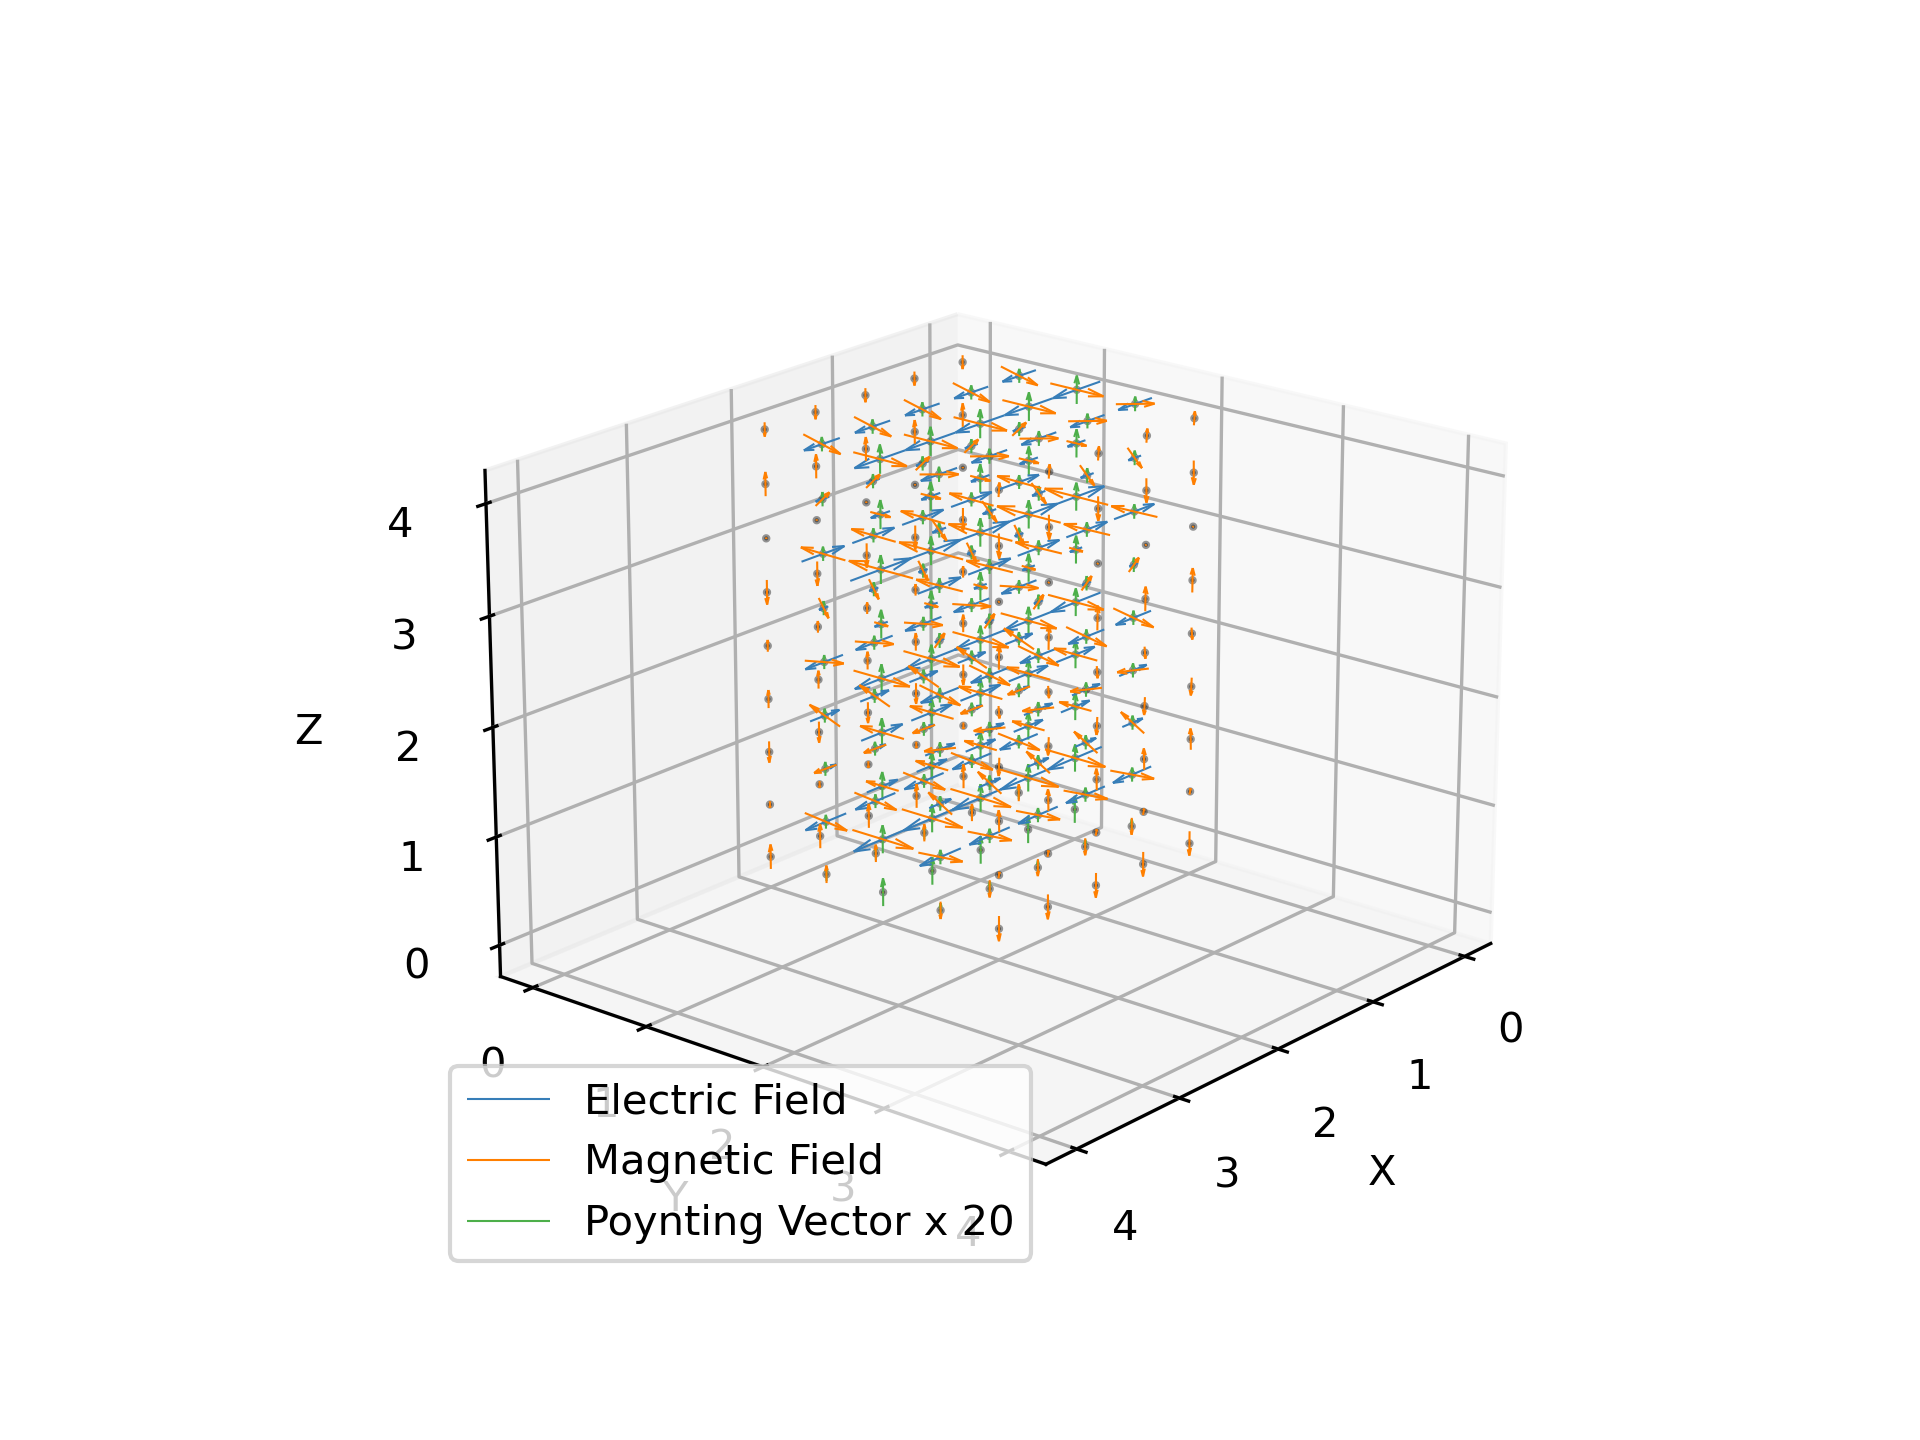

In [103]:
# Plot the field.
s_scale = 20

fig = plt.figure(dpi=300)
ax = fig.add_subplot(projection='3d')
ax.quiver3D(X,Y,Z, Ex.real, Ey.real, Ez.real, pivot='middle',
            linewidth=0.5, color=e_color, label='Electric Field')
ax.quiver3D(X,Y,Z, Bx.real, By.real, Bz.real, pivot='middle',
            linewidth=0.5, color=b_color, label='Magnetic Field')
ax.quiver3D(X,Y,Z, s_scale*Sx.real, s_scale*Sy.real, s_scale*Sz.real, pivot='middle',
            linewidth=0.5, color=s_color, label='Poynting Vector x %d' % s_scale)
ax.scatter3D(X,Y,Z,'.',s=1,c='k',alpha=0.4)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.auto_scale_xyz([0, Lz], [0, Lz], [0, Lz])
ax.view_init(20,40)
ax.legend()

## Questions

Describe the field pattern.
- In what direction does the electric field point? The magnetic field? The Poynting vector?
- How do the fields change with position?
- Where is the electric field largest?
- Where is the Poynting vector largest? Smallest?

***Describe your observations below.***

-  The electric field points along the X-axis, however its amplitude seems to change based on Y and Z (not clear to me how though). The sign of the electric field alternates along with the magnetic field (constant Poynting vector direction).
-  The magnetic field seems to be circulating on the YZ plane (though, it is hard to tell).
-  The Poynting vector(s) are small, but a are all pointing in the +Z direction.
<br>
The electric field looks to be greatest at around Y = 0.75, Z = 1 and is very small at around Y = 0, 1.5 and Z = 0, 1.5 (and Z = 3 to a lesser extent). <br>
The Poynting vectors are zero anywhere the electric field is zero, and thusly follow the above observation.

- Observe what happens as you change the wave vector, `k`.
- Observe what happens as you change the angle of incidence, `theta`.

***Describe your observations below.***

Changing the wave vector dramatically effects 'shape' of the electric and magnetic fields; as k increses in magnitude, the 'size' of the magnetic circulation (the pattern which seems to define the direction of the electric field vector, or perhaps vice-versa) increses. This effects the magnitude of the Poynting vectors, but not their direction. <br>
As the angle of incidence changes, the shape of the electric and magnetic fields changes substantially, however, I could not figure out any distinctive pattern while stepping in 5 degree increments. Of course, as the angle of incidence approaches 90 degrees, the electric and magnetic fields die out (and therefore the Poynting vectors as well), but this is a trival case. The other trival case (theta = 0) leaves only the magnetic field, and as a result is similar. <br> Perhaps an animation whould help show the relationship?

In order to satisfy the boundary conditions of this wave guide, the electric field should vanish on the conducting plates at $y=0$ and $y=b$ (or `y = box_width`.  (Other waves do not satisfy Maxwell's equations.  Although we can plot them, they are impossible to create in the real world.)

Adjust the ***angle*** and ***wave vector*** until you achieve this.

You may find the discussion on page 233 of _CER_ helpful ...

**Congratulations!**  You just created a TEM mode for this waveguide.

- What wave vector and angle did you use?
- How do the fields compare with your general observations above?  I.e., is there anything special about this field, aside from the fact that the electric field vanishes at the boundaries?

***Describe your observations below.***

Solving k*cos(theta) = n*pi for n = 1, I set cos = pi/4 and k = 4, which yeilded an angle of 38.24 degrees. Plugging in k = 4, theta = 38.24 resulted in the electric field indeed vanishing at Y = 0 & 2 (and Y = 1 interestingly), but magnetic field was also perfectly aligned with Y or Z instead of arbitrary angles in the YZ plane like in all previous combinations.

Keep the magnitude of the wave vector constant, but adjust the ***angle*** until you find another value that gives zero field on the boundaries at $y=0$ and $y=b$.

- What wave vector and angle did you use this time?
- How do the fields for this TEM mode compare with your first TEM mode?

***Describe your observations below.***

Another TEM mode for k = 4 was found at theta = 67, which I didn't expect since 67 was not near any factors of 38.24, nor 90/120/180 +- 38.24. In this configuration, the magnetic field still circulates like all the others, but unlike the previous TEM mode, the highest Poynting vectors where at Y = 1 where it was zero before. Additionally, the magnetic field was not neatly aligned like the previous TEM mode as well.

## TE Modes

Now we will turn our attention to a different kind of waveguide: a hollow pipe.  As shown in _CER_ at the end of Section 7.3, there are no possible TEM modes in a hollow pipe.  However, we can find TE modes — in which the electric field is perpendicular to the direction of propagation but the magnetic field is not — and TM modes — in which the magnetic field is perpendicular to the direction of propagation and the electric field is not.  We focus on the rectangular waveguide of Section 7.5.

In a "remarkable set of equations" (7.52–55), Heald and Marion show that all of the components of the electric and magnetic fields can be obtained from the longitudinal components, $B_z$ and $E_z$.  For a TE mode, $E_z = 0$, and for a TM mode, $B_z=0$.  So we only need to know one component of the field to solve for the entire set.

For TE modes, the normal derivative of the longitudinal magnetic field must vanish on the boundaries.  This gives

$$
B_z = B_0 \, e^{i(k_z z - \omega t)} \, \cos \left( \dfrac{M \pi x}{a} \right) \, \cos\left( \dfrac{N \pi y}{b} \right)
$$

$M$ and $N$ are positive integers. $a$ and $b$ are the length and width of the rectangle.  The code below will generate a field plot for a single TE mode.

In [49]:
t = 0

# Define the mode.
M = 1
N = 1

# Define the longitudinal wave vector.
kz = np.pi / 2

# Determine compute the transverse wave vector and frequency.

a = Lx
b = Ly
kx = M*np.pi/a
ky = N*np.pi/b
omega = np.sqrt(kx**2 + ky**2 + kz**2) / n

# Define group and cutoff wavenumbers.
kg = kz
kc = np.sqrt(kx**2 + ky**2)

# Define longitudinal magnetic field.
B0 = 0.7
Bz = B0 * np.exp(1j*(kz*Z - omega*t)) * np.cos(M*np.pi*X/a) * np.cos(N*np.pi*Y/b)

# Compute other components of fields.
Bx = -1j * kg * kx / kc**2 * B0 * np.exp(1j*(kz*Z - omega*t)) \
    * np.sin(M*np.pi*X/a) * np.cos(N*np.pi*Y/b)
By = -1j * kg * ky / kc**2 * B0 * np.exp(1j*(kz*Z - omega*t)) \
    * np.cos(M*np.pi*X/a) * np.sin(N*np.pi*Y/b)
Ex = n*omega / kg * By
Ey = -n*omega / kg * Bx
Ez = np.zeros_like(Bz)

# Compute total Poynting vector.
Sx = 1/(8*np.pi*mu) * (Ey * Bz.conj() - Ez * By.conj())
Sy = 1/(8*np.pi*mu) * (Ez * Bx.conj() - Ex * Bz.conj())
Sz = 1/(8*np.pi*mu) * (Ex * By.conj() - Ey * Bx.conj())

<IPython.core.display.Javascript object>


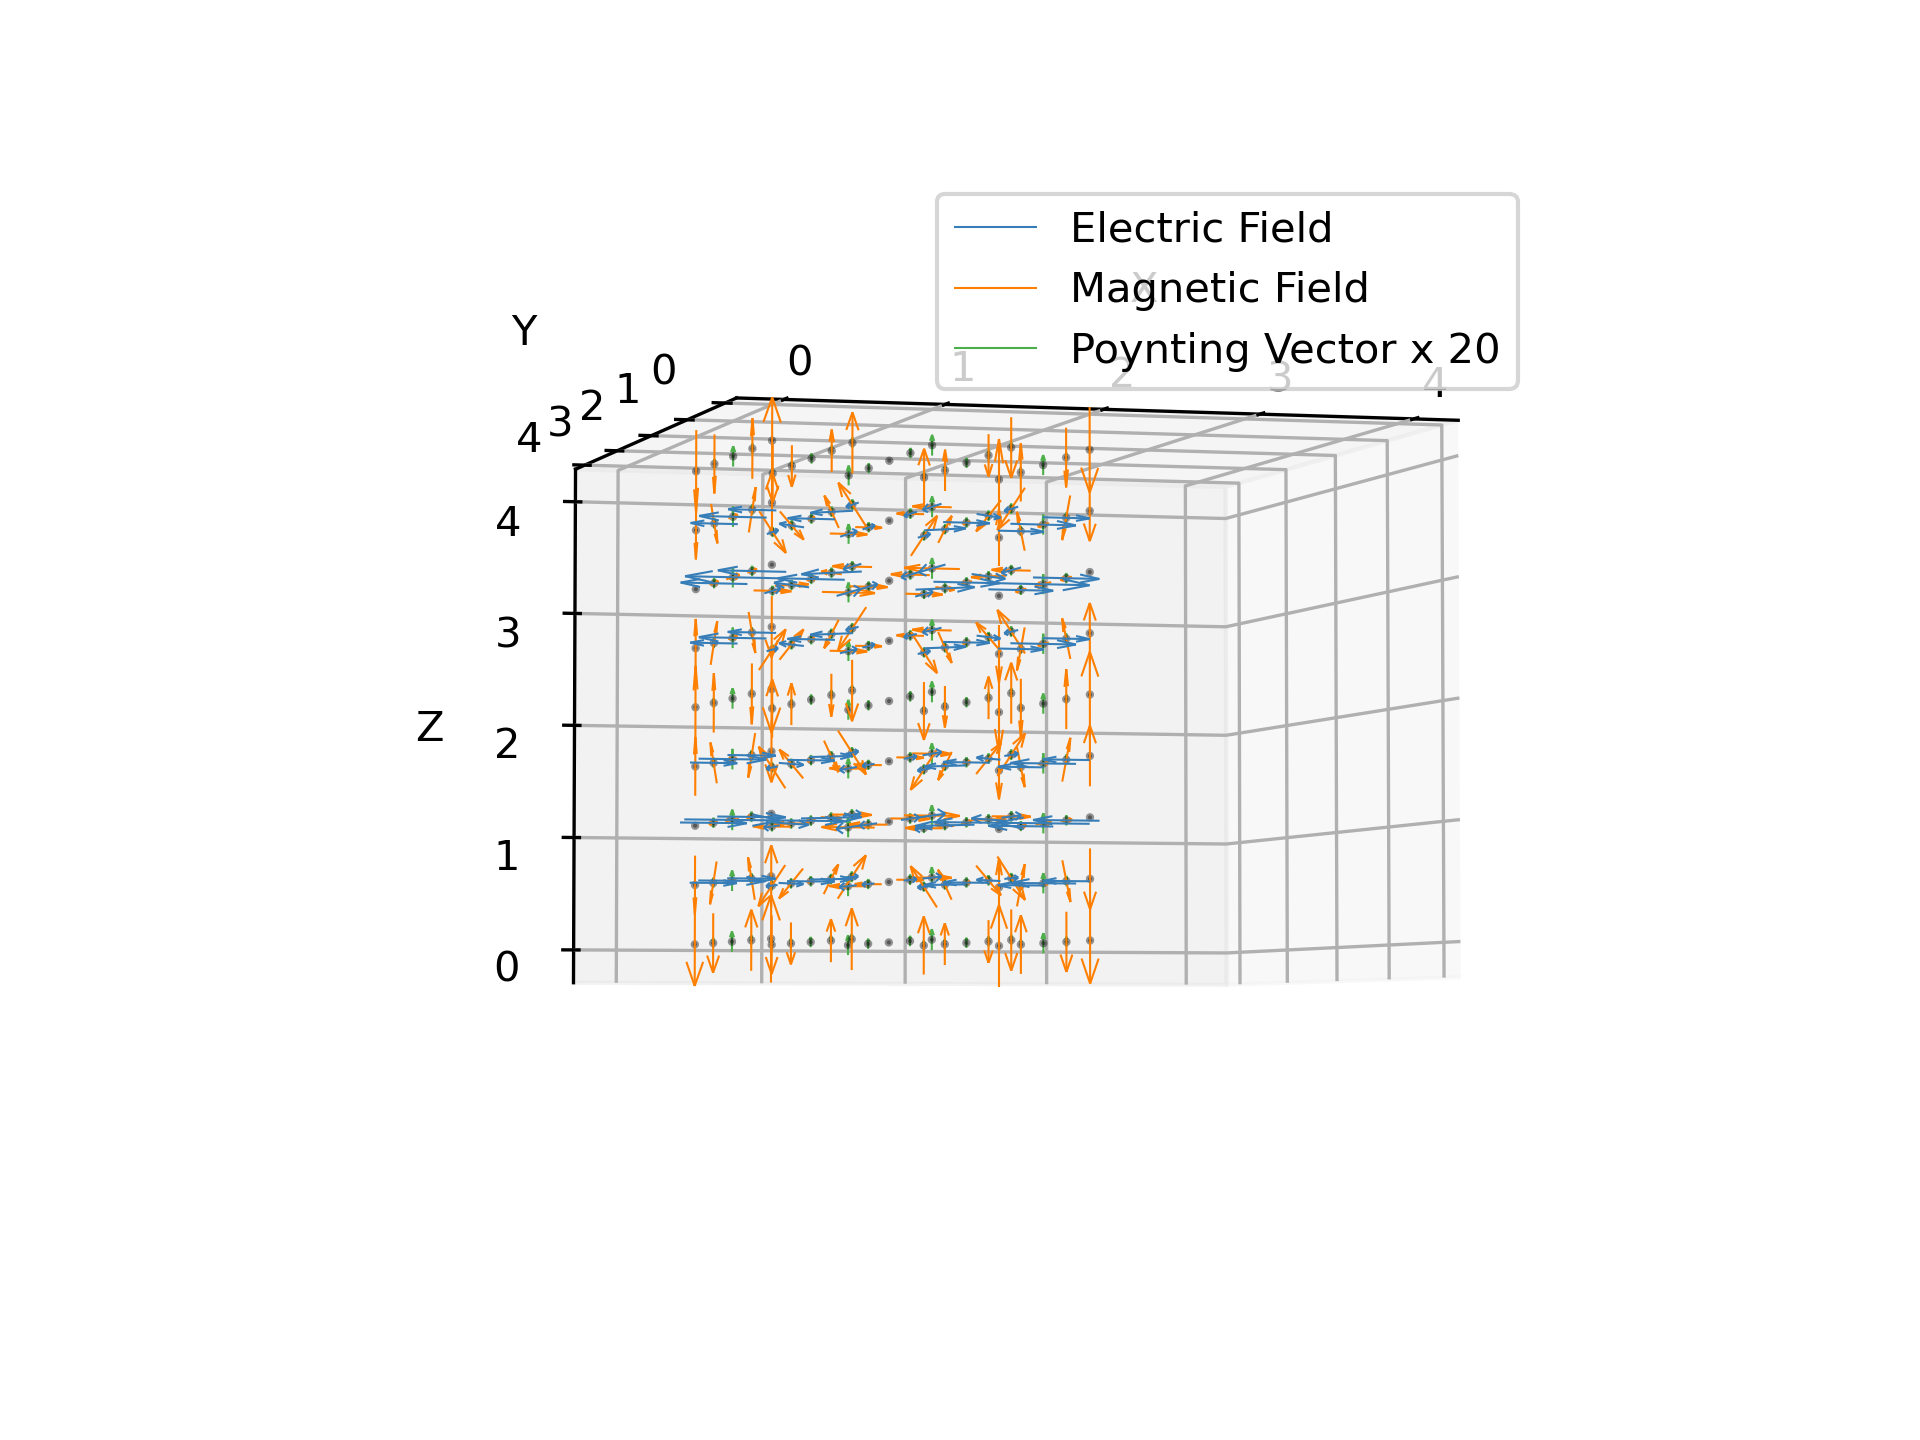

In [50]:
# Plot the field.
s_scale = 20

fig = plt.figure(dpi=300)
ax = fig.add_subplot(projection='3d')
ax.quiver3D(X,Y,Z, Ex.real, Ey.real, Ez.real, pivot='middle',
            linewidth=0.5, color=e_color, label='Electric Field')
ax.quiver3D(X,Y,Z, Bx.real, By.real, Bz.real, pivot='middle',
            linewidth=0.5, color=b_color, label='Magnetic Field')
ax.quiver3D(X,Y,Z, s_scale*Sx.real, s_scale*Sy.real, s_scale*Sz.real, pivot='middle',
            linewidth=0.5, color=s_color, label='Poynting Vector x %d' % s_scale)
ax.scatter3D(X,Y,Z,'.',s=1,c='k',alpha=0.4)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.auto_scale_xyz([0, Lz], [0, Lz], [0, Lz])
ax.view_init(20,40)
ax.legend()

## Questions

Start with $M=1$ and $N=0$ — the TE₁₀ mode.  Change the longitudinal wave vector $k_z$ (the variable `kz` above).

Describe the field pattern.
- In what direction does the electric field point? The magnetic field? The Poynting vector?
- How do the fields change with position?
- Where is the electric field largest?
- Where is the Poynting vector largest? The smallest?

***Describe your observations below.***

-  The electric field is orthognal to the magnetic field (X-axis) and its sign is based on the direction of the magnetic field; when the magnetic field vectors are pointed in +Y, the electric field vectors are +X, and -Y yeilds -X. The amplitude of the electric field vectors is highest when the magnetic field is most aligned with the Y-axis.
-  The magnetic field is (as usual) circulating on the YZ plane. The direction of circulation still alterantes between CW and CCW.
-  The Poynting vectors all point (pun intended) in the +Z direction, and their amplitude varies depending on Y - with zero at the boundaries and a maximum in the center.

Adjust the box dimensions by changing `Lx` and `Ly` in the cell near the top of the notebook and replotting.

How does the field pattern change?

***Describe your observations below.***

-  Incresing the size by 50% seems to just make everything bigger without changing the shape of the fields.
-  Decreasing the size by 50%, in a similar fashion, made everything smaller.
-  Incresing Ly by 50% and Decreasing Lx by 50% had the same effect as Incresing the size by 50%, with the reduced volume of course. <br><br>
In conclusion, changing the size of the waveguide did not effect the shape of the fields, but did have a large effect of the field magnitude - with a larger waveguide hosting larger fields.

Compare the TE₁₀ and TE₀₁ modes.  How are they similar?  How are they different?

***Describe your observations below.***

In TE01 mode, the whole system of fields seems to have rotated; the magnetic field now circulates on the XZ plane. The Poynting vectors remain still point in +Z, but are now dependant on X instead of Y (0 at X = 0, 2). <br>
All together, there was not much that changed.

Compare the TE₁₀ and TE₀₁ modes to the TE₁₁ mode.  How are they similar?  How are they different?

***Describe your observations below.***

What in the world am I looking at?<br>
The Poynting vectors have nearly entirely disappeared, with the remainder (which might be a FE error) still pointing in +Z. The magnetic field is now circulating spherically, forming line of 'spheres' along the Z-axis. The electric field vectors point into the boundary of the magnetic 'spheres' on the Y-axis, and out of the same boundary on the X-axis, and are also aligned with XY plane. The sign of this behavior alternates along the Z-axis.<br>
While the magnetic field was mostly expected (easy to understand from a superposition of TE10 & TE01) from the TE01 and TE10 modes, the electric field behavior was unexpected. Ultimately, this still displays the properties of both TE01 and TE10, with the exception of the disappearing Poynting vector.

## TM Modes

For TM modes, the longitudinal electric field must vanish on the boundaries.  This gives

$$
E_z = E_0 \, e^{i(k_z z - \omega t)} \, \sin \left( \dfrac{M \pi x}{a} \right) \, \sin\left( \dfrac{N \pi y}{b} \right)
$$

$M$ and $N$ are positive integers. $a$ and $b$ are the length and width of the rectangle.  The code below will generate a field plot for a single TM mode.

In [99]:
t = 0

# Define the mode.
M = 1
N = 1

# Define the longitudinal wave vector.
kz = np.pi / 2

# Determine compute the transverse wave vector and frequency.
a = Lx
b = Ly
kx = M*np.pi/a
ky = N*np.pi/b
omega = np.sqrt(kx**2 + ky**2 + kz**2) / n

# Define group and cutoff wavenumbers.
kg = kz
kc = np.sqrt(kx**2 + ky**2)

# Define longitudinal electric field.
E0 = 0.7
Ez = E0 * np.exp(1j*(kz*Z - omega*t)) * np.sin(M*np.pi*X/a) * np.sin(N*np.pi*Y/b)

# Compute other components of fields.
Ex = 1j * kg * kx / kc**2 * E0 * np.exp(1j*(kz*Z - omega*t)) \
    * np.cos(M*np.pi*X/a) * np.sin(N*np.pi*Y/b)
Ey = 1j * kg * ky / kc**2 * E0 * np.exp(1j*(kz*Z - omega*t)) \
    * np.sin(M*np.pi*X/a) * np.cos(N*np.pi*Y/b)
Bx = -n*omega / kg * Ey
By = n*omega / kg * Ex
Bz = np.zeros_like(Ez)

# Compute total Poynting vector.
Sx = 1/(8*np.pi*mu) * (Ey * Bz.conj() - Ez * By.conj())
Sy = 1/(8*np.pi*mu) * (Ez * Bx.conj() - Ex * Bz.conj())
Sz = 1/(8*np.pi*mu) * (Ex * By.conj() - Ey * Bx.conj())

<IPython.core.display.Javascript object>


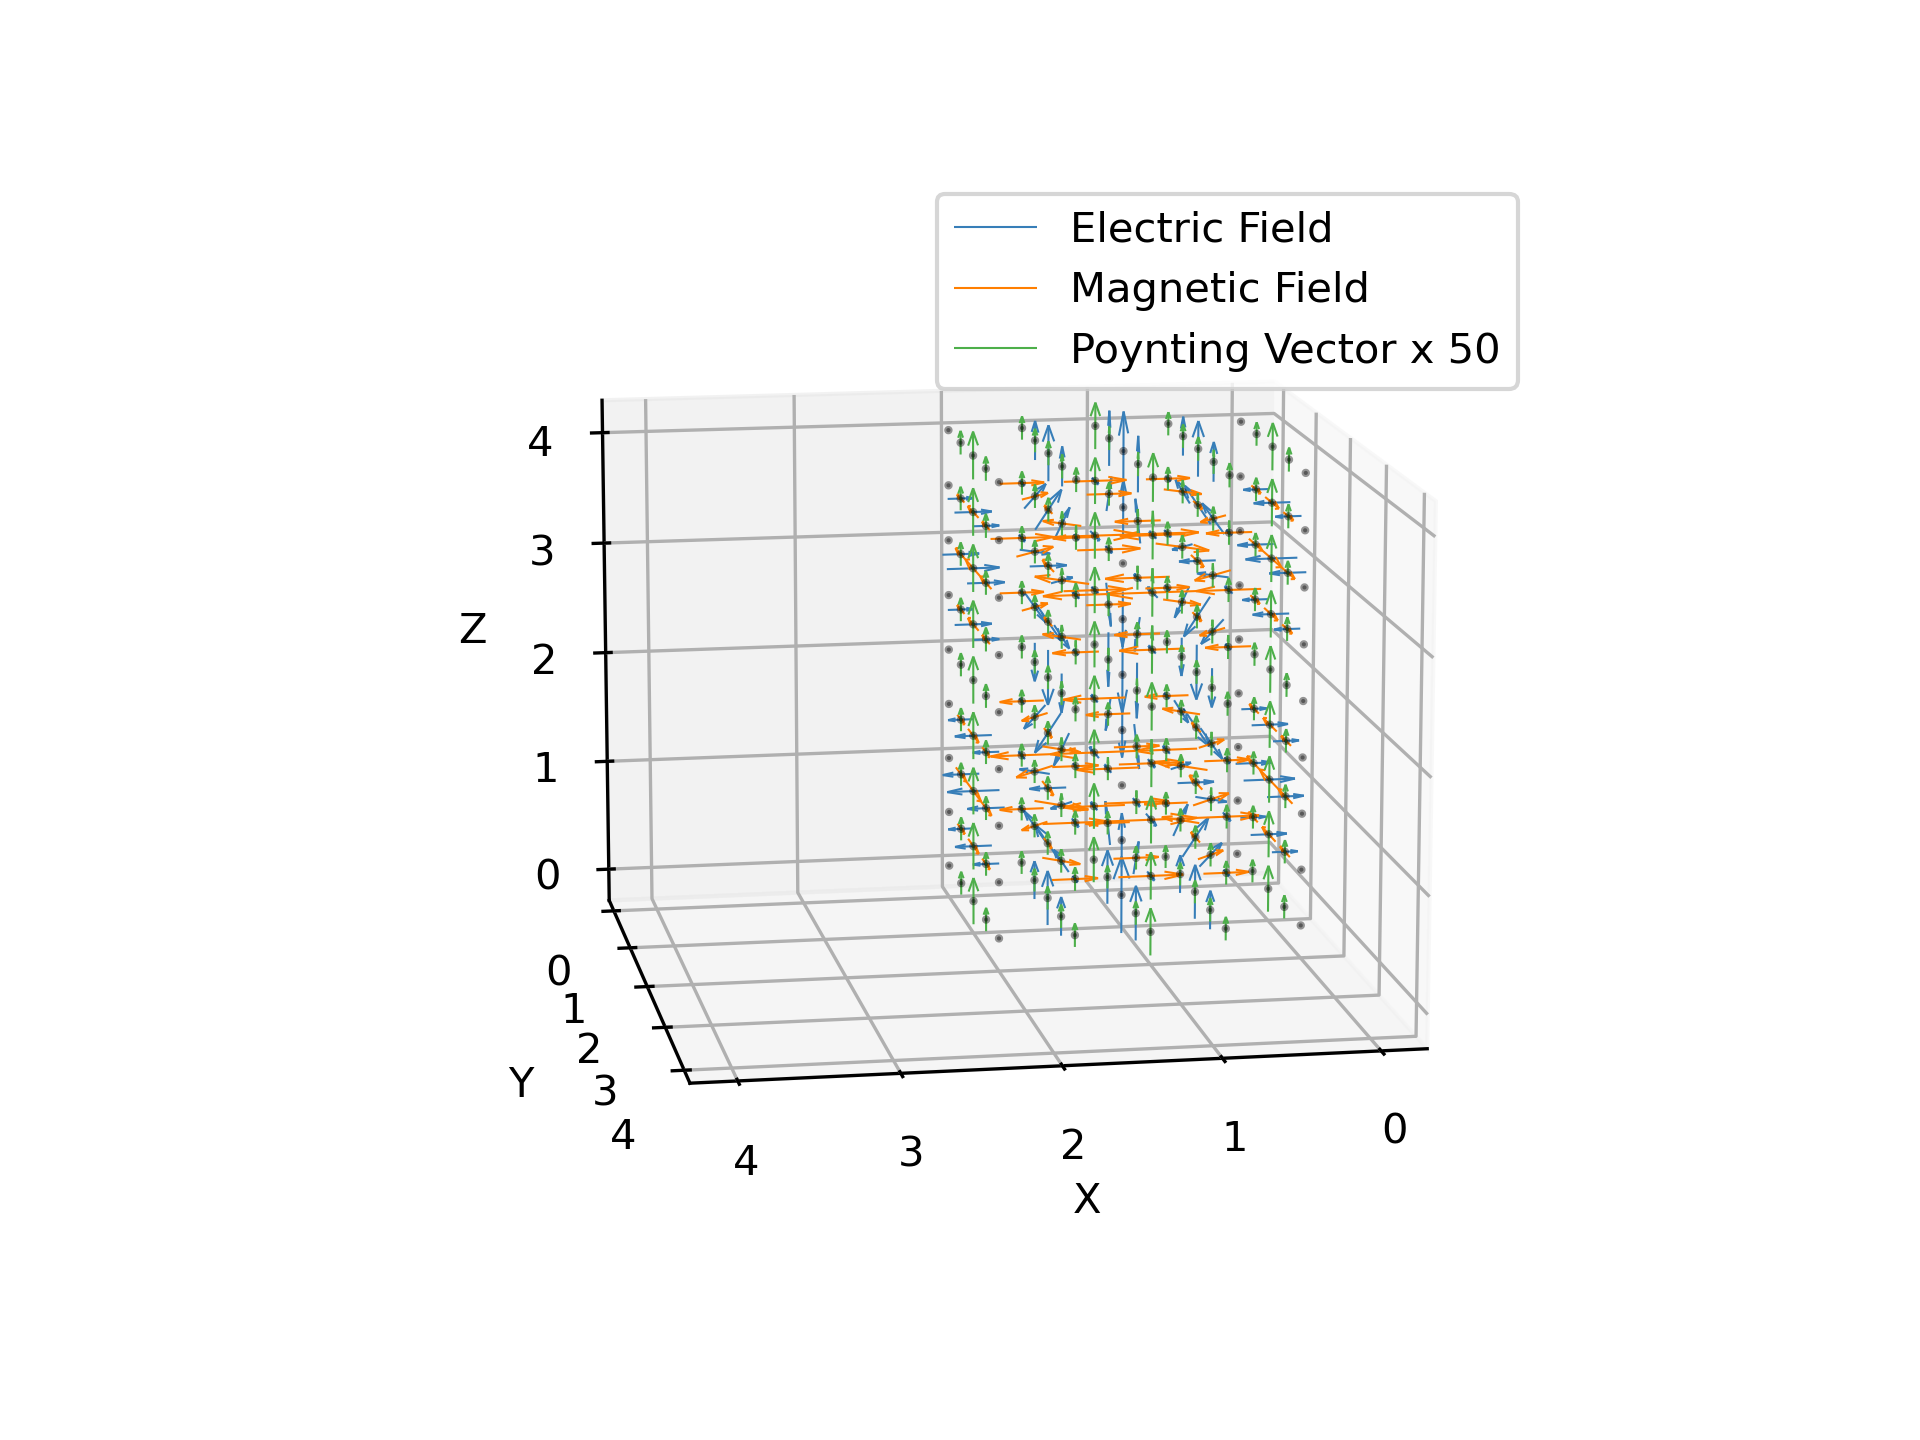

In [100]:
# Plot the field.
s_scale = 50

fig = plt.figure(dpi=300)
ax = fig.add_subplot(projection='3d')
ax.quiver3D(X,Y,Z, Ex.real, Ey.real, Ez.real, pivot='middle',
            linewidth=0.5, color=e_color, label='Electric Field')
ax.quiver3D(X,Y,Z, Bx.real, By.real, Bz.real, pivot='middle',
            linewidth=0.5, color=b_color, label='Magnetic Field')
ax.quiver3D(X,Y,Z, s_scale*Sx.real, s_scale*Sy.real, s_scale*Sz.real, pivot='middle',
            linewidth=0.5, color=s_color, label='Poynting Vector x %d' % s_scale)
ax.scatter3D(X,Y,Z,'.',s=1,c='k',alpha=0.4)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.auto_scale_xyz([0, Lz], [0, Lz], [0, Lz])
ax.view_init(20,40)
ax.legend()

In [12]:
%matplotlib notebook

## Questions

Start with $M=1$ and $N=1$ — the TE₁₁ mode.  Change the longitudinal wave vector $k_z$ (the variable `kz` above).

Describe the field pattern.
- In what direction does the electric field point? The magnetic field? The Poynting vector?
- How do the fields change with position?
- Where is the electric field largest?
- Where is the Poynting vector largest? The smallest?

***Describe your observations below.***

It's quite cool looking. <br>
The magnetic field circulates on the XY plane, but its amplitude (and sign) also oscillates across the Z-axis.
The electric field generally points into and out of the magnetic field at the planes of highest amplitude. Since the sign of the magnetic field alternates, so too does the diection of the electric field vectors, and achieves its highest amplitude in the center of the waveguide (along the Z-axis).
The Poynting vector still points in the +Z direction, however, it is highest on the center of edges of the waveguide and lowest in the corners and very center (could be an FE error), but is otherwise farily small and homogeneous.

Adjust the box dimensions by changing `Lx` and `Ly` in the cell near the top of the notebook and replotting.

How does the field pattern change?

***Describe your observations below.***

Doing the same experiments as in the same question for the the TE modes, the same behavior was observed; the field shapes did not change (it only stretched), and the amplitude of the Poynting vectors scaled with the area of the waveguide.

Compare the TE₁₀ and TE₀₁ modes to the TE₁₁ mode.  How are they similar?  How are they different?

***Describe your observations below.***

Assuming you meant comparing the TM10 and TM01 modes to the TM11 mode: <br>
Well, I'm not 100% this is intended, but TM10 and TM01 don't seem to exist since there is no electric or magnetic field when either **m** or **n** are set to 0. 

Compare the TE₁₂ and TE₂₁ modes to the TE₁₁ mode.  How are they similar?  How are they different?

***Describe your observations below.***

Assuming you meant comparing the TM12 and TM21 modes to the TM11 mode: <br>
As one might expect from a higher mode, TM12 and TM21 have similar shapes (one is the rotated form of the other) and have twice as many 'features'. For example in TM12 and TM21 there are two distinct rings of magnetic vectors (as opposed to only one in TM11) and, by extension, two separate 'columns' of electric field vectors. <br>
In each case, the Poynting vectors are still in the +Z direction. Additionally, the vertical (Z-axis) 'envelope' for the magnetic fields is similar (the same?) for TM12, TM21, and TM11. 

## Images of Fields

Compare the image of a TEM mode in Figure 7-3 with the plots you made above.

- How are they similar?  How are they different?
- Is one a "better" representation of the electromagnetic wave than the other, in your opinion?  Explain why or why not.

***Describe your observations below.***

Aside from the comparison, let me just say that trying to move the view to match Figure 7-3 might have been one of the most frustrating things I ahve ever attempted. <br>
The figure only shows the wave directions at one point in space and time (as opposed to many points in space at one time), but this is enough to get the point across. Visually, the figure also displays the angle of incidence (as a tilted plane) and the walls in a explicit manner, whereas the plot does not feature this explicitly. <br>
In my personal opinion, I feel like neither is "better" then the other since the figure does a better job describing the system, whereas the plot is better at conveying the wave itself and its immediate interactions with the system boundaries.

Try to create a plot of the TEM₁₀ that resembles Figure 7-6.  You may need to adjust the box size, number of grid points, and arrow sizes.

- Is one a "better" representation of the electromagnetic wave than the other, in your opinion?  Explain why or why not.

Unfortunately, I completely failed to recreate Figure 7-6. This is due to two factors:<br>
-  The ax.view_init(a,b) function is very hard to produce an isometric view with the azimuth and elevation parameters
-  I could not find a way to view variable contents in Jupyter notbooks, and Spyder wouldn't show the field component arrays either for some reason. I need to know the structure of these variables to take a 'slice' of them for the figure. <br>
Assuming that I could have figured that out, then I would probably say that the python plot would be better since the walls can be drawn and the wave could be animated. This would simply give more information then a picture.

In your opinion what would be the ideal way to represent the electromagnetic waves in a waveguide?  It could be a combination of images, math, text, audio, video, etc.  What features would you emphasize?  What would you leave out?

I would probably say that my "ideal" representation of a waveguide would use the center electric and magnetic slices from figure 7-6, animated over time, with small, semitransparent, Poynting vectors thoughout the volume. This way the shape of the wave elements could easily be observed, and the time evolution gives a idea of directionality. Finally, the Poynting vectors would show the power 'flow'.

# Reflection and Summary

- What are the major takeaways of this assignment for you?
- What was the most difficult part of this assignment?
- What was the most interesting part of this assignment?
- What questions do you have?

-  The major takeaway was that the TE and TM modes share a similar, predictable, geometry - and that the upper TE and TM modes simply pack in more of this same geometry (but smaller)
-  The most difficult part, as with a few of these assignment now, is the abstraction of the variable/array/function structure; it is hard to work on what you can't see. This time in particular, completely prevented me from doing one of the prompts. Aside from that, the plots themselves are hard to decipher.
-  The most interesting part was the relationship between the TX10 & TX10 and the TX11 modes, as visually it looks different than what I expected with superposition. It is still a bit unlcear to me if this is a result of plots being hard to read, or if there isn't actually any superposition going on.
-  All of my questions and comments are inline, as usual.